# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_combined_data = pd.merge(mouse_metadata, study_results, how= "left", on= "Mouse ID")

# Display the data table for preview
df_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = mouse_metadata["Mouse ID"].count()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df_duplicate_data = df_combined_data[df_combined_data.duplicated(subset =["Mouse ID", "Timepoint"], keep= "last")]
df_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean_data = df_combined_data.drop_duplicates(["Mouse ID", "Timepoint"])
df_clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_number_mice = df_clean_data["Mouse ID"].nunique()
total_number_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = df_clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = df_clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = df_clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_volume = df_clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM_tumor_volume = df_clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Total Volume Mean" : mean_tumor_volume,
    "Total Volume Median" : median_tumor_volume,
    "Total Volume Varience" : variance_tumor_volume,
    "Total Volume Standard Deviation" : std_tumor_volume,
    "Total Volume Sem" : SEM_tumor_volume
})

summary_statistics


,Total Volume Mean,Total Volume Median,Total Volume Varience,Total Volume Standard Deviation,Total Volume Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution

# Using the aggregation method to produce the summary statistics in a single line

summary_statistics_advanced = df_clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
     mean="mean",
     median="median",
     var="var",
     std="std",
     sem="sem"
    
)



# Display the summary statistics table
summary_statistics_advanced


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

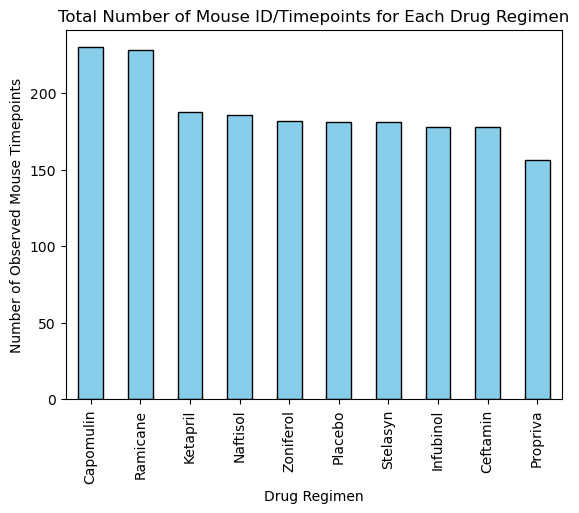

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
drug_counts = df_clean_data['Drug Regimen'].value_counts()

# Generate a bar plot for the counts
drug_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the plot title and labels
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

# Show the plot
plt.show()


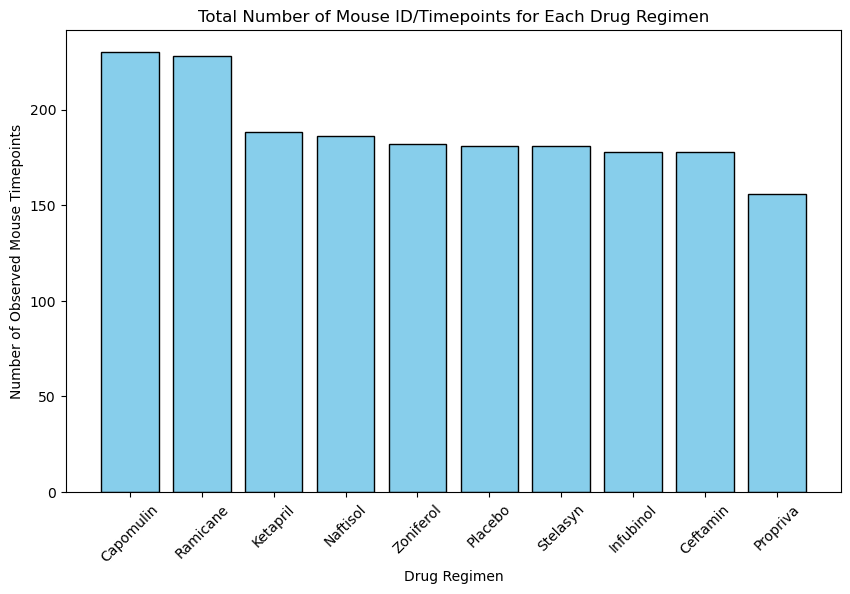

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of entries for each drug regimen
# drug_counts = df_clean_data['Drug Regimen'].value_counts()

# Generate the bar plot using Matplotlib (Pyplot)
plt.figure(figsize=(10,6 ))
plt.bar(drug_counts.index, drug_counts.values, color='skyblue', edgecolor='black')

# Add title and labels to the plot
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


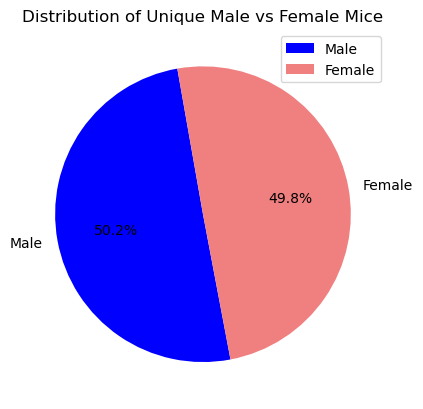

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Filter unique mice with their gender
unique_mice_gender = df_clean_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Count the number of unique male and female mice
gender_counts = unique_mice_gender['Sex'].value_counts()

# Generate a pie chart showing the distribution
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=100, colors=['blue', 'lightcoral'], 
            legend=True)

# Set title and display the pie chart
plt.title("Distribution of Unique Male vs Female Mice")
plt.ylabel('')  # Hide y-label for cleaner appearance
plt.show()



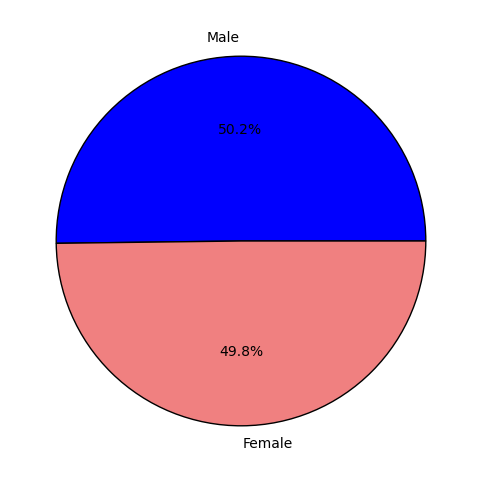

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = df_clean_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Make the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['blue', 'lightcoral'], wedgeprops={'edgecolor': 'black'})
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint =  df_clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint,  df_clean_data, on=['Mouse ID', 'Timepoint'], how='right')

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_df[merged_df['Drug Regimen'].isin(treatments)]

# Display the final tumor volumes for each mouse
final_tumor_volume = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
final_tumor_volume

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1863,z581,Infubinol,25,54.316407
1864,z581,Infubinol,30,56.286750
1865,z581,Infubinol,35,58.628399
1866,z581,Infubinol,40,60.053740


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = df_clean_data.loc[df_clean_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # Add subset to the list
    tumor_vol_data.append(drug_data)

    # Calculate IQR
    quartiles = np.percentile(drug_data, [25, 75])
    lowerq = quartiles[0]
    upperq = quartiles[1]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"{treatment} potential outliers: {outliers.tolist()}")

NameError: name 'np' is not defined

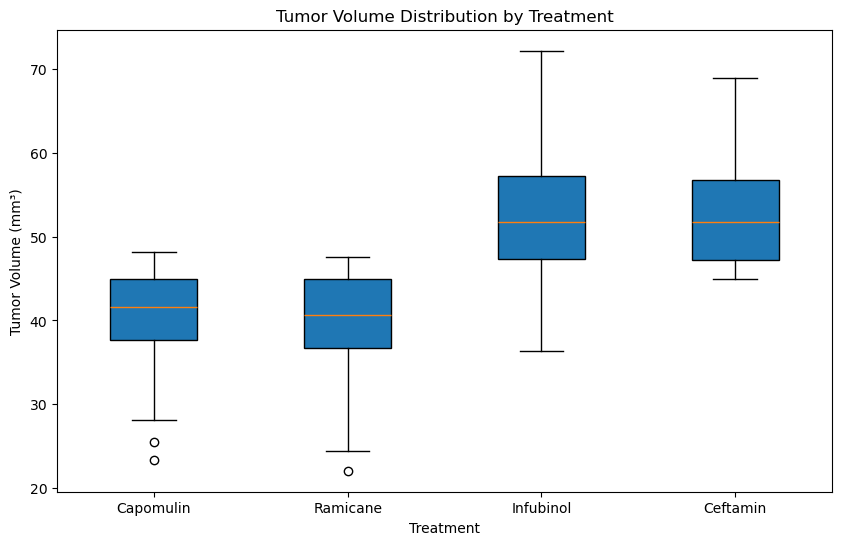

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Generate the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)

# Customize plot
plt.title("Tumor Volume Distribution by Treatment")
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm³)")

# Show plot
plt.show()

## Line and Scatter Plots

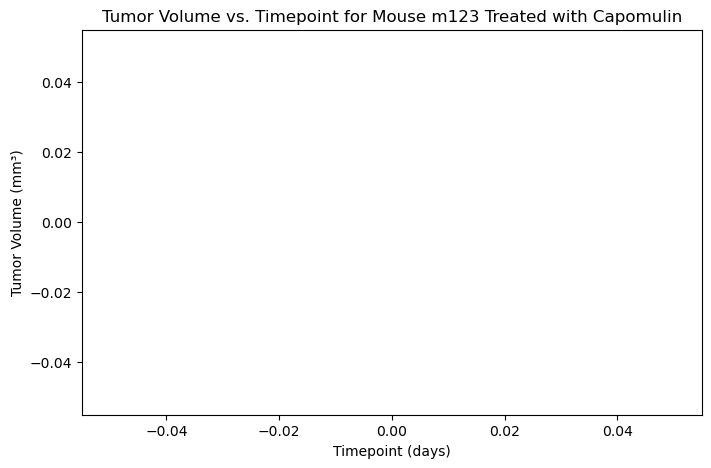

In [ ]:

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Replace 'm123' with the actual Mouse ID you want to plot
mouse_id = 'm123'  
capomulin_data = df_clean_data[(df_clean_data["Drug Regimen"] == "Capomulin") & (df_clean_data["Mouse ID"] == mouse_id)]

# Sort data by timepoint
capomulin_data = capomulin_data.sort_values(by="Timepoint")

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker='o', color='b')

# Customize plot
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} Treated with Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm³)")

# Show plot
plt.show()


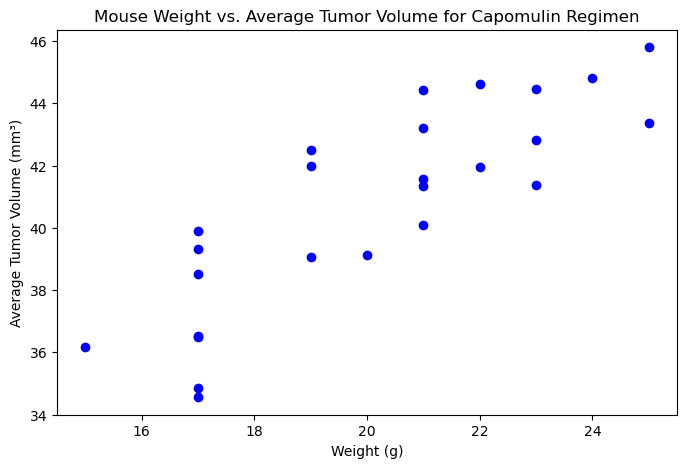

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter for Capomulin data only
capomulin_data = df_clean_data[df_clean_data["Drug Regimen"] == "Capomulin"]

# Group by 'Mouse ID' and calculate the average tumor volume and unique weight per mouse
average_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(mouse_weight, average_tumor_vol, color='blue')

# Customize plot
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm³)")

# Show plot
plt.show()


## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84
Slope: 0.95
Intercept: 21.55
R-squared: 0.71


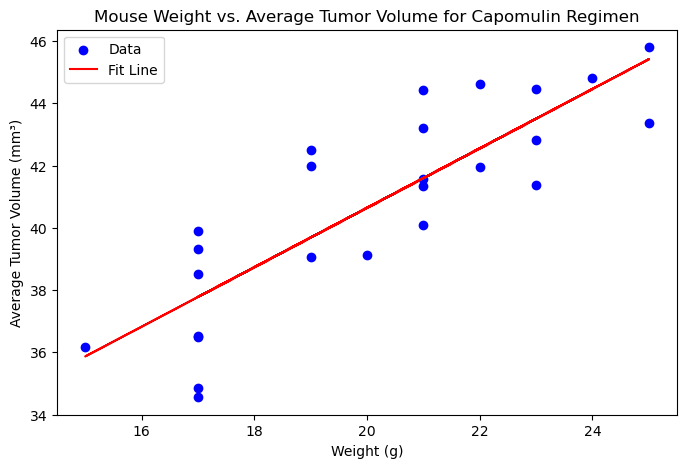

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import pearsonr, linregress


# Calculate the correlation coefficient
correlation_coef, _ = pearsonr(mouse_weight, average_tumor_vol)
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation_coef:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_vol)

# Print regression details
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")

# Plot the scatter plot with regression line
plt.figure(figsize=(8, 5))
plt.scatter(mouse_weight, average_tumor_vol, color='blue', label="Data")
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', label="Fit Line")

# Customize plot
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm³)")
plt.legend()

# Show plot
plt.show()
